# Modellerstellung

In [11]:
import tensorflow as tf
from tensorflow.keras import models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime


channel = 3
#channel = 1

#res = 28
#res = 32
res = 64
#res = 128


dir = "/home/dl4/training_datasets/"
training_data = np.load(dir + "training_data_{}_augmented.npy".format(res), allow_pickle=True)
print(training_data.shape)
class_names = ["Side", "Front", "Downwards", "Upwards"]



(16600, 2)


In [12]:
### Zwischenschritt für augmentierte Daten <-- auskommentieren, wenn nicht gebraucht ###
### Uniformer Datensatz generieren (gleiche Rowzahl für alle Labels) ### 

# # Aufteilung der Daten in separate Arrays nach Label
# side = training_data[training_data[:,1]==0, :]
# front = training_data[training_data[:,1]==1, :]
# down = training_data[training_data[:,1]==2, :]
# up = training_data[training_data[:,1]==3, :]

# # Aus den getrennten Datensätzen wird jeweils ein sample der Größe des Labels mit der geringsten Datensatzzahl (upwards = 802 elemente) genommen
# # --> Gleichverteilung der Label
# side_sampled = side[np.random.choice(side.shape[0], len(up), replace=False), :]
# front_sampled = front[np.random.choice(front.shape[0], len(up), replace=False), :]
# down_sampled = down[np.random.choice(down.shape[0], len(up), replace=False), :]
# up_sampled = up
# # Gleichgroße Daten werden wieder zusammengefügt und geshuffelt
# sampled = np.vstack((side_sampled, front_sampled, down_sampled, up_sampled))
# np.random.shuffle(sampled)

# training_data = sampled
# print(training_data.shape)

bilder = len(training_data)

(3208, 2)


In [13]:
# Trainingsdaten für Tensorflow aufbereiten

# Datensatz in Features & Labels aufteilen
train_image = training_data[:,0]
train_label = training_data[:,1]

# Array-"Korpus" mit der TensorFlow-gerechten Form instanziieren um diese mit den Daten zu befüllen
train_img = np.zeros((bilder ,res ,res, 3))
# Befüllen des richtig-formatierten Arrays
for i,img in enumerate(train_image):
    train_img[i]= img
print(train_img.shape)  

#konvertiert Farbbilder zu Grayscale
# train_img = tf.image.rgb_to_grayscale(train_img)
# print(train_img.shape)

(3208, 64, 64, 3)


In [14]:
# Features normalisieren
train_img = train_img/255

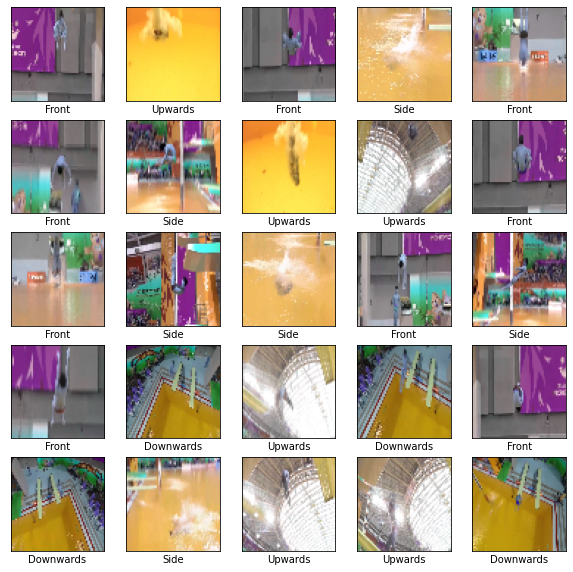

In [16]:
# Visualisierung der Daten
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [17]:
# Datentyp für tensorflow anpassen
x = np.asarray(train_img).astype(np.float32)
y = np.asarray(train_label).astype(np.float32)

# Modellname
model_name = "model_{}_color_few_15".format(res)

# Anzahl der Labels (für den Outputlayer)
num_classes = 4

"""many"""
# model = models.Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel))) 
# model.add(MaxPooling2D((1, 1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes))
# model.summary()

"""few"""
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes))
model.summary()

"""very_few"""
# model = models.Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel))) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes))
# model.summary()

"""high"""
# model = models.Sequential()
# model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(res, res, channel))) 
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes))
# model.summary()

"""standard"""
# model = models.Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(res, res, channel)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes))
# model.summary()

#Modell kompilieren
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Modell trainieren
history = model.fit(x, y, epochs=15, validation_split=0.2, batch_size=16)

#Modell speichern
model.save('/home/dl4/models/{}'.format(model_name))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3444800   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 3,464,452
Trainable params: 3,464,452
Non-trainable params: 0
____________________________________________